# Problem 1
Neural networks are trained and tested with different datasets to make sure that the networks can actually
deal with new data and not just data it has already seen. If the label of a tested image corresponds to the
largest entry of the output vector, the image has been correctly classified by the network. The fraction of
correctly classified test images is a measure for the network’s performance.

a) Loading the MNIST npy files provided in the shared folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-02-02 16:00:28.190294: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 16:00:28.219093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 16:00:28.219117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 16:00:28.219747: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 16:00:28.223892: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-02 16:00:28.224209: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# a) Load MNIST datasets
data_train = np.load('/mnt/share/nnds/mnist/mnistDataTrain.npy')
labels_train = np.load('/mnt/share/nnds/mnist/mnistLabelsTrain.npy')

data_test = np.load('/mnt/share/nnds/mnist/mnistDataTest.npy')
labels_test = np.load('/mnt/share/nnds/mnist/mnistLabelsTest.npy')

b) Creating a network with 784 input nodes, 100 hidden nodes, 10 output nodes and a learning rate of 0.6 and training the network with all 60000 images of the dataTrain dataset.

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28 x 28 = 784 input nodes
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2024-02-02 16:00:33.047944: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 16:00:33.048474: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
lr = 0.6

In [5]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Defining a function for plotting the model to compare trained and initial model's weight matrices.

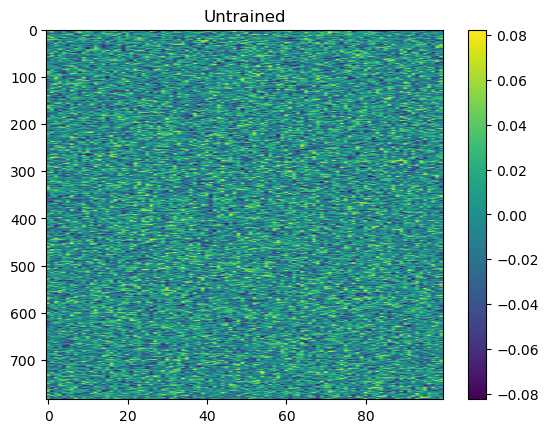

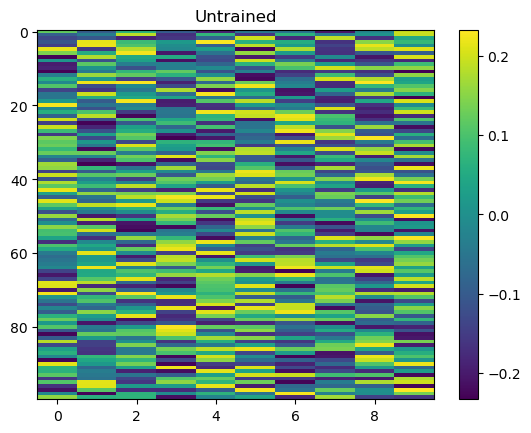

In [6]:
def plot_weights(model, title):
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights, _ = layer.get_weights()
            plt.imshow(weights, cmap='viridis', aspect='auto')
            plt.colorbar()
            plt.title(title)
            plt.show()

plot_weights(model, 'Untrained')

In [7]:
# training the model
model.fit(data_train, labels_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2483 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1209 - accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0915 - accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.0768 - accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 2s 876us/step - loss: 0.0668 - accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.0548 - accuracy: 0.9827
Epoch 7/10
1875/1875 [==============================] - 2s 874us/step - loss: 0.0503 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0458 - accuracy: 0.9856
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0435 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 2s 987us/step - l

c) was omitted in the question sheet ;)

d) Writing a function or a method evaluate that determines the fraction of dataTest images that the
network classifies correctly.

In [8]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    correct_predictions = np.sum(np.argmax(predictions, axis=1) == y_test)
    total_images = len(y_test)
    accuracy = correct_predictions / total_images
    return accuracy

In [9]:
# evaluating the model
test_accuracy = evaluate(model, data_test, labels_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 0s 449us/step
Test Accuracy: 0.973


The network's great performance is shown in its accuracy of 97.3 % on test data.

Now showing the updated weight matrix of the trained model.

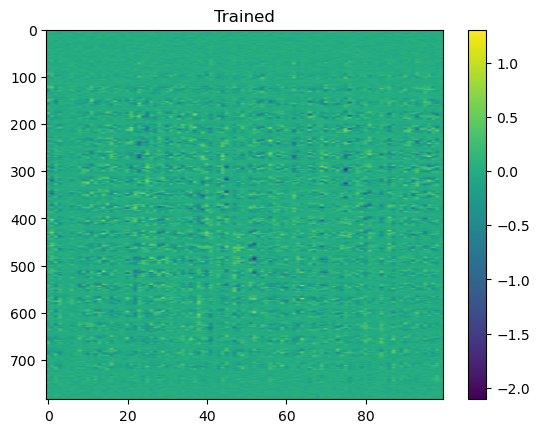

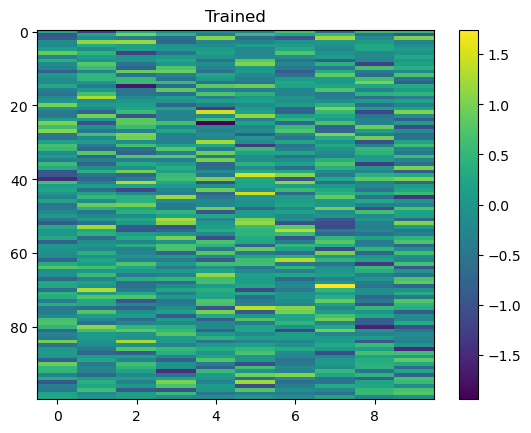

In [10]:
plot_weights(model, 'Trained')

# Problem 2
Training large neural network can be a very long process. Therefore, we need a method to permanently save
and restore a network’s memory.

Using OOP to create a class with `saveWeights` and `restoreWeights` methods as requested in a) and b).

In [11]:
class NeuralNetwork:
    def __init__(self, input_size_sqrt, hidden_size, output_size):
        self.input_size_sqrt = input_size_sqrt
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.model = self.build_model()

    def build_model(self):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(self.input_size_sqrt, self.input_size_sqrt)),
            tf.keras.layers.Dense(self.hidden_size, activation='relu'),
            tf.keras.layers.Dense(self.output_size, activation='softmax')
        ])
        return model

    def train(self, x_train, y_train, epochs=10):
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.model.fit(x_train, y_train, epochs=epochs)

    def save_weights(self, filename_wih="wih.npy", filename_who="who.npy", filename_wih_b="wih_b.npy", filename_who_b="who_b.npy"):   # a.
        wih, who = self.model.layers[1].get_weights()[0], self.model.layers[2].get_weights()[0]
        wih_b, who_b = self.model.layers[1].get_weights()[1], self.model.layers[2].get_weights()[1]
        np.save(filename_wih, wih)
        np.save(filename_who, who)
        np.save(filename_wih_b, wih_b)
        np.save(filename_who_b, who_b)

    def restore_weights(self, filename_wih="wih.npy", filename_who="who.npy", filename_wih_b="wih_b.npy", filename_who_b="who_b.npy"):   # b.
        wih, who, wih_b, who_b = np.load(filename_wih), np.load(filename_who), np.load(filename_wih_b), np.load(filename_who_b)
        self.model.layers[1].set_weights([wih, wih_b])
        self.model.layers[2].set_weights([who, who_b]) 

c) Creating an instance of the network testNet, training it, save the network’s weights, setting them to 0 and
restoring them again. And lastly, verifying that your network is able to classify handwritten numbers again.

In [12]:
testNet = NeuralNetwork(input_size_sqrt=28, hidden_size=100, output_size=10)

# Training the network
testNet.train(data_train, labels_train, epochs=10)

# Saving the weights
testNet.save_weights("wih.npy", "who.npy", "wih_b.npy", "who_b.npy")

# Setting the weights to 0
testNet.model.layers[1].set_weights([np.zeros_like(w) for w in testNet.model.layers[1].get_weights()])
testNet.model.layers[2].set_weights([np.zeros_like(w) for w in testNet.model.layers[2].get_weights()])

# Restoring the weights
testNet.restore_weights("wih.npy", "who.npy", "wih_b.npy", "who_b.npy")

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1225 - accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0843 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0513 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0422 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0347 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [13]:
# Evaluating the model with restored weights
test_accuracy = evaluate(testNet.model, data_test, labels_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 0s 534us/step
Test Accuracy: 0.977
